<a href="https://colab.research.google.com/github/fercouri/Fundamentos-de-Mecanica-das-Estruturas/blob/main/Quest%C3%A3o_3_MAC019.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#**TRABALHO MAC019**
Prof: Tatiana Danelon

#**Questão 3**

#**Figura 1**

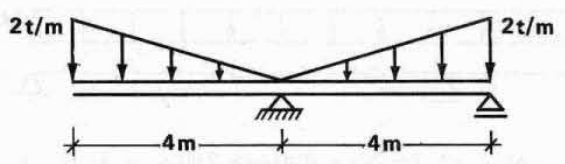

#**a)**

Reação em A: 8.00 kN
Reação em B: 0.00 kN


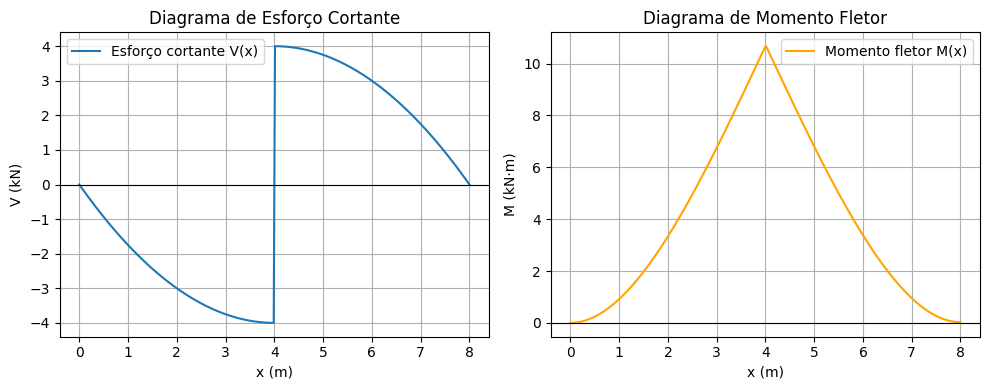

O máximo em módulo no intervalo [0, 4] é: 10.6667


In [ ]:
# importando os pacotes
import numpy as np
import matplotlib.pyplot as plt
from sympy import symbols, diff, solve, Abs

L = 8
# Reações de apoio:
RB = 0
RA = 8

print(f'Reação em A: {RA:.2f} kN')
print(f'Reação em B: {RB:.2f} kN')



# --- Esforço cortante V(x) ---
def V(x):
    if 0 <= x <= 4:
      return  - 2*x + 0.25*x*x
    elif 4 < x <= 8:
      return 4 - 0.25*(x-4)**2

# --- Momento fletor M(x) ---
def M(x):
    if 0 <= x <= 4:
      return -x*x + (0.25*x*x*x)/3  #integrei a cortante
    elif 4 < x <= 8:
      return 4*(x-4) - 0.25 * (0.333* x**3- 4*x**2 + 16*x)  - 5.4 #integrei a cortante

# --- Avaliar e plotar ---

xs = np.linspace(0, L, 300)
Vs = np.array([V(x) for x in xs])
Ms = np.array([M(x) for x in xs])

plt.figure(figsize=(10,4))
plt.subplot(1,2,1)
plt.plot(xs, Vs, label='Esforço cortante V(x)')
plt.axhline(0, color='black', linewidth=0.8)
plt.title('Diagrama de Esforço Cortante')
plt.xlabel('x (m)')
plt.ylabel('V (kN)')
plt.grid(True)
plt.legend()

plt.subplot(1,2,2)
plt.plot(xs, -Ms, label='Momento fletor M(x)', color='orange')
plt.axhline(0, color='black', linewidth=0.8)
plt.title('Diagrama de Momento Fletor')
plt.xlabel('x (m)')
plt.ylabel('M (kN·m)')
plt.grid(True)
plt.legend()

plt.tight_layout()
plt.show()



f = -x*x + (0.25*x*x*x)/3  # Função simetrica, logo, é possivel obter o valor maximo do momento fletor com apenas a primeira equação
intervalo=(0, 8)
x = symbols('x')
a=0
b=4
# Avalia a função nos extremos do intervalo
fa = f.subs(x, a).evalf()
fb = f.subs(x, b).evalf()
max_abs = max(Abs(fa), Abs(fb))
print(f"O máximo em módulo no intervalo [{a}, {b}] é: {max_abs:.4f}")

#**b)**

**Solução analítica**

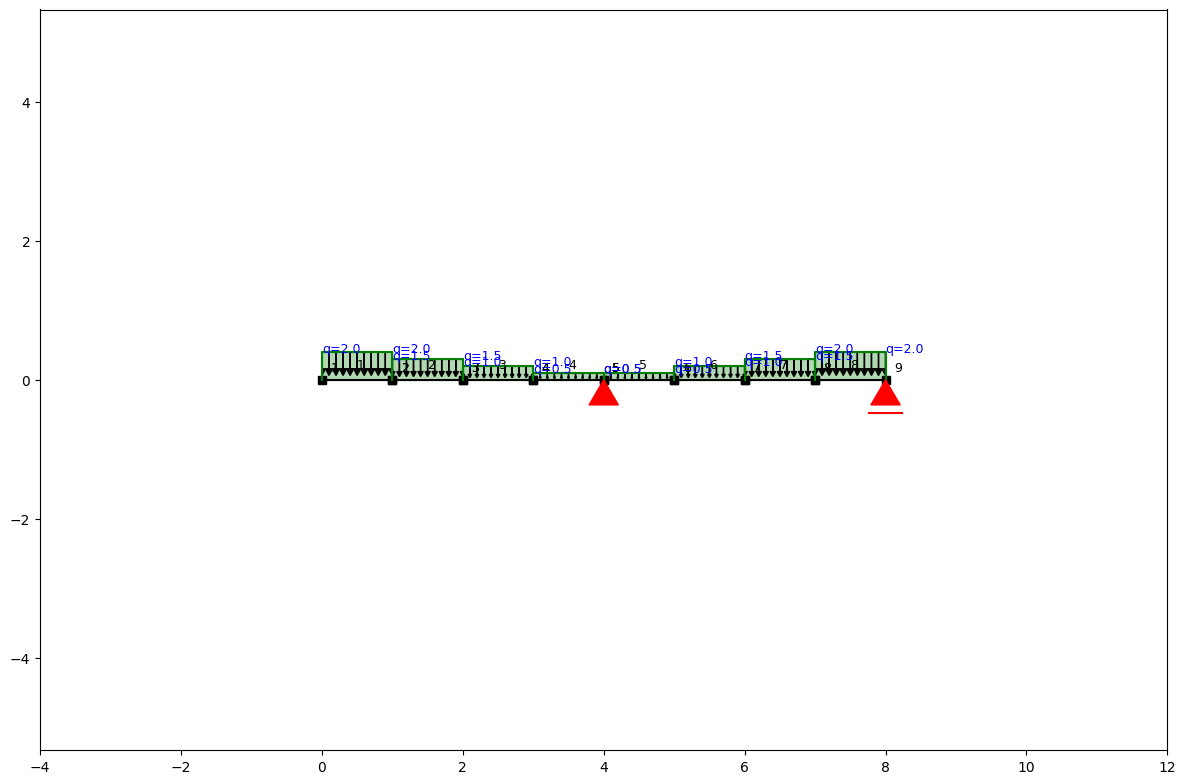

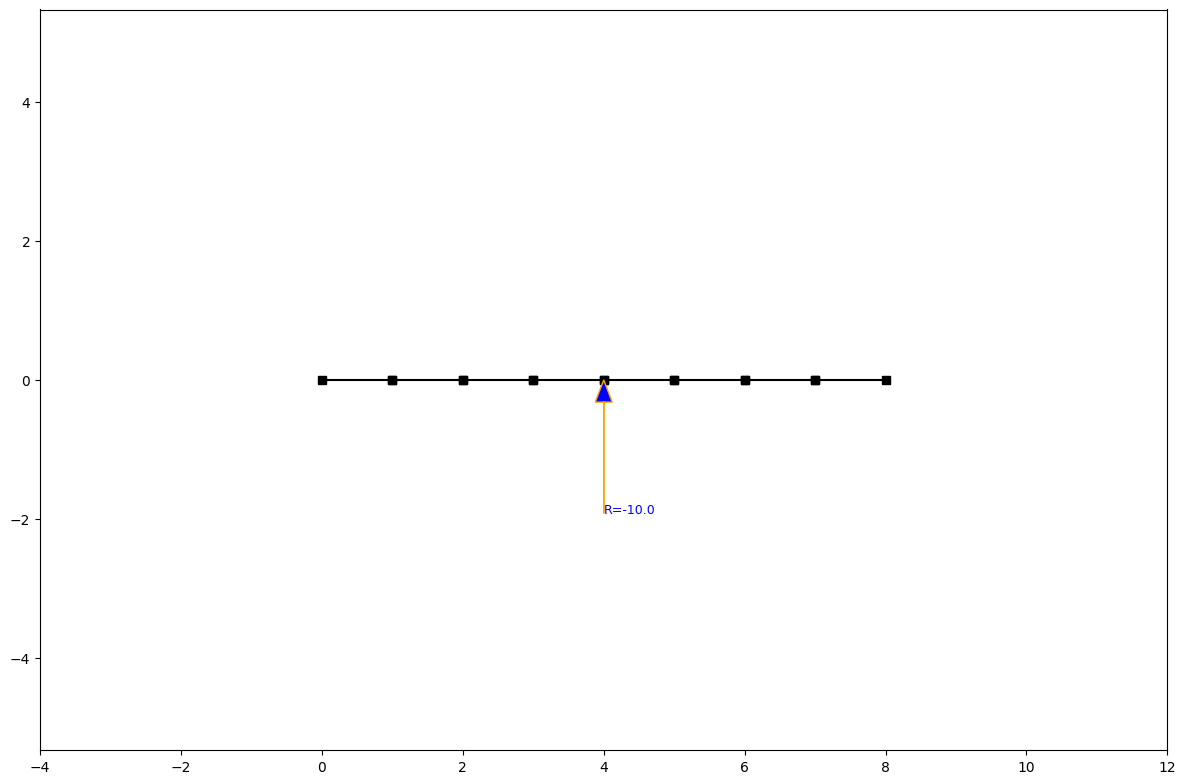

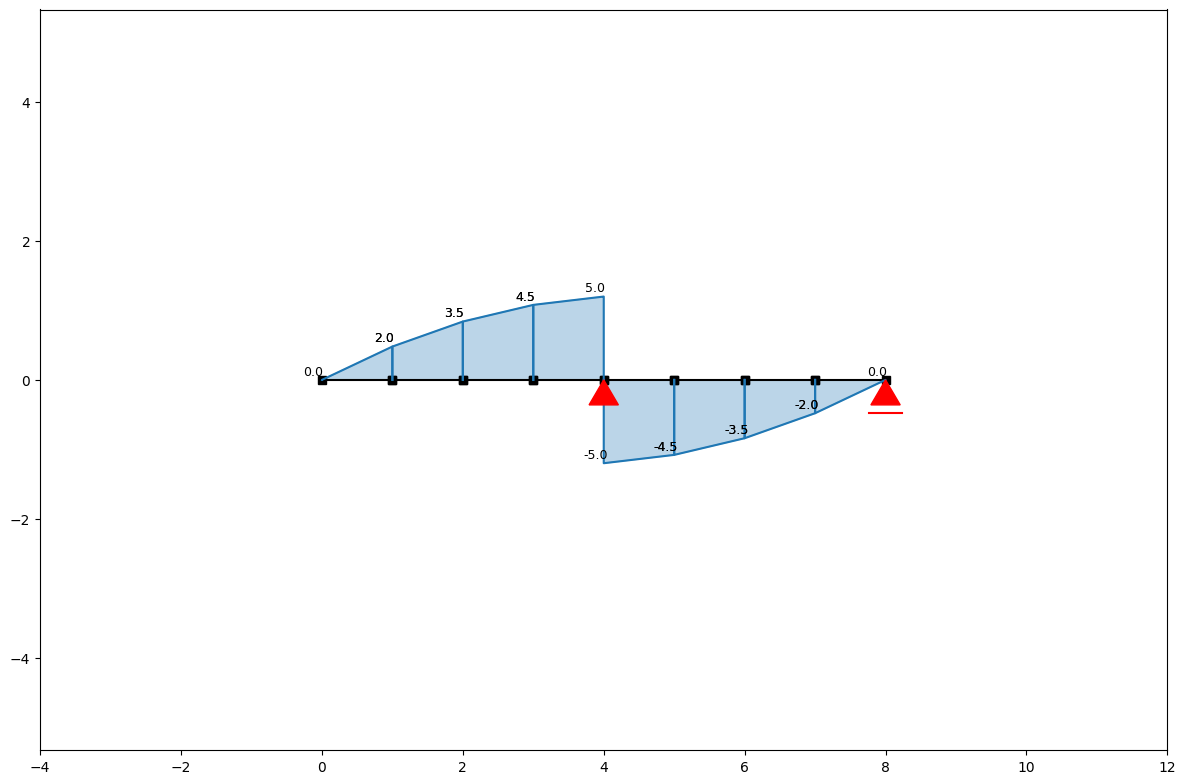

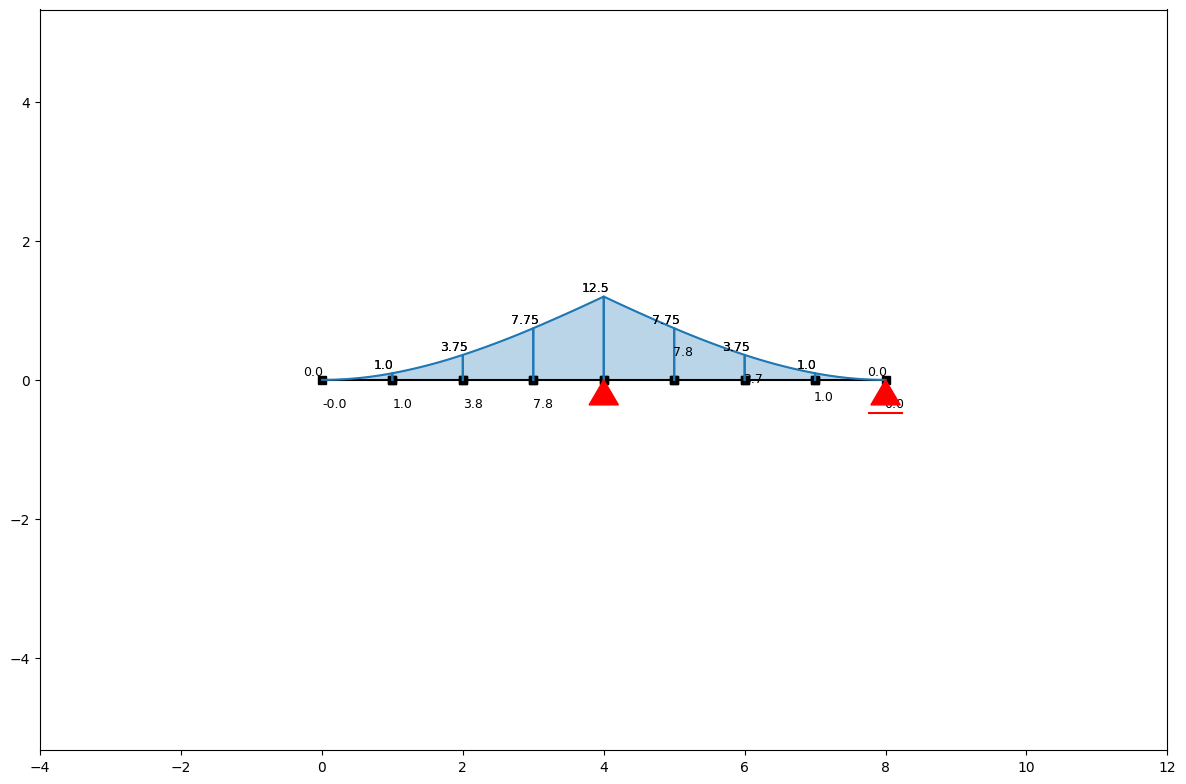

In [ ]:
# instalação do anastruct
!pip install anastruct

# importando os pacotes
import numpy as np
import matplotlib.pyplot as plt

from anastruct import SystemElements


ss = SystemElements()

# Definição dos elementos
elements = [
    [ [0, 0],   [1.0, 0] ], # elemento 1
    [ [1.0, 0], [2.0, 0] ], # elemento 2
    [ [2.0, 0], [3.0, 0] ], # elemento 3
    [ [3.0, 0], [4.0, 0] ], # elemento 4
    [ [4.0, 0], [5.0, 0] ], # elemento 5
    [ [5.0, 0], [6.0, 0] ], # elemento 6
    [ [6.0, 0], [7.0, 0] ], # elemento 7
    [ [7.0, 0], [8.0, 0] ], # elemento 8
   ]

# Definição da viga
for e in elements:
  ss.add_element(location = e)

# Apoios
ss.add_support_hinged(node_id=5)
ss.add_support_roll(node_id=9, direction='x')

# Carregamento
ss.q_load(q=-2.0, element_id=1, direction='element')
ss.q_load(q=-1.5, element_id=2, direction='element')
ss.q_load(q=-1.0, element_id=3, direction='element')
ss.q_load(q=-0.5, element_id=4, direction='element')
ss.q_load(q=-0.5, element_id=5, direction='element')
ss.q_load(q=-1.0, element_id=6, direction='element')
ss.q_load(q=-1.5, element_id=7, direction='element')
ss.q_load(q=-2.0, element_id=8, direction='element')

ss.show_structure()
ss.solve()
ss.show_reaction_force()
ss.show_shear_force()
ss.show_bending_moment()

#**c)**

**Numero mínimo de subdivisões:**

------------------------------------------------------------------------------------------------
Precisão alcançada com 30 elementos
Momento fletor calculado(com erro menor que 5%): 11.18814829790889 e momento fletor real de 10.66


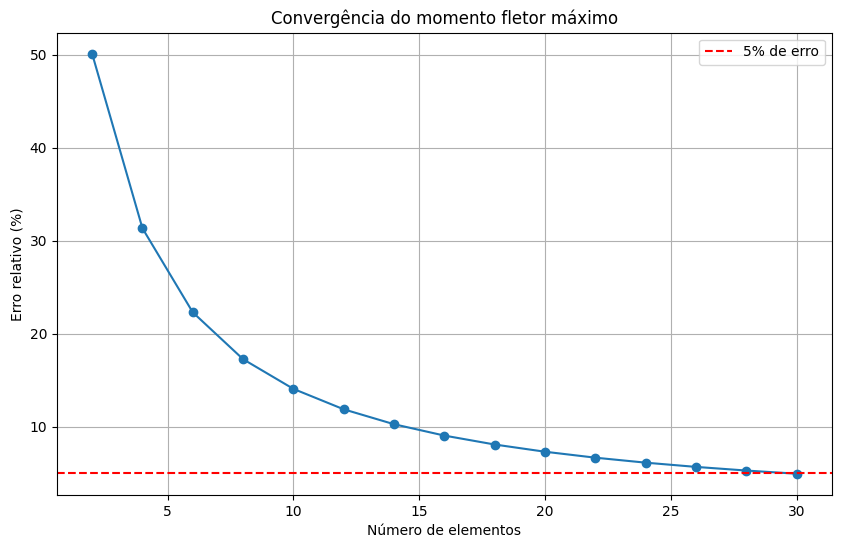


Resultados:
2 elementos: 50.09% de erro
4 elementos: 31.33% de erro
6 elementos: 22.30% de erro
8 elementos: 17.26% de erro
10 elementos: 14.07% de erro
12 elementos: 11.88% de erro
14 elementos: 10.27% de erro
16 elementos: 9.05% de erro
18 elementos: 8.09% de erro
20 elementos: 7.32% de erro
22 elementos: 6.68% de erro
24 elementos: 6.14% de erro
26 elementos: 5.69% de erro
28 elementos: 5.30% de erro
30 elementos: 4.95% de erro


In [ ]:
from operator import add
# instalação do anastruct
!pip install anastruct

# importando os pacotes
import numpy as np
import matplotlib.pyplot as plt
from anastruct import SystemElements
print(f"------------------------------------------------------------------------------------------------")
# Solução analítica conhecida (momento fletor máximo)
momMAX_analitico = 10.66  # tm (valor teórico)

# Parâmetros da viga
L = 8  # m (comprimento total)
q = 2  # t/m (carga distribuída)

# Listas para armazenar resultados
mMAX = []
num_elementos = []
erros_relativos = []

# Loop para testar diferentes números de elementos
for ne in range(2, 39, 2):  # Testando de 1 a 20 elementos
    ss = SystemElements()

    # Criar elementos com nós igualmente espaçados
    x = np.linspace(0, L, ne + 1)  # Pontos de 0 a L
    for i in range(ne):
        ss.add_element(location=[[x[i], 0], [x[i+1], 0]])

    # Identificar o nó que está no meio da barra (x = L/2 = 4 m)
    if ne == 2:  # Número ímpar de elementos → nó central
        no_meio = 2
    else:  # Número par de elementos → escolher o nó mais próximo
        no_meio = (ne / 2) + 1

    # Apoios:
    # - Primeiro apoio (engaste) no meio (nó correspondente a x=4m)
    # - Segundo apoio (rolete) na extremidade (último nó, x=8m)
    ss.add_support_hinged(node_id=no_meio)
    ss.add_support_roll(node_id=ne + 1, direction='x')  # Último nó

    # Carregamento uniforme em todos os elementos
    for el in range(1, ne + 1):
        if el == 1:
          ss.q_load(q=-2, element_id=el, direction='element')

        elif el < (ne/2)+1:
          ss.q_load(q= (-q/(ne/2)) * ( ((ne/2) + 1) - el), element_id=el, direction='element')

        elif el == ne:
          ss.q_load(q=-2, element_id=el, direction='element')

        else:
          ss.q_load(q=(-q/(ne/2)) * ( el - ((ne/2) )), element_id=el, direction='element')

    # Resolver
    ss.solve()
    #ss.show_structure()
    momentos = []
    for el in range(1, ne + 1):      # Armazena os momentos afim de depois encontrar o maior entre eles
      momentos.extend(ss.element_map[el].bending_moment)

    momMAX_numerico = max(abs(m) for m in momentos) # Acha o maior momento

    erro_relativo = abs((momMAX_numerico - momMAX_analitico)/momMAX_analitico)

    # Verificar se atingimos a precisão desejada
    if erro_relativo < 0.05:  #se erro relativo < 5%, paramos o programa
        print(f"Precisão alcançada com {ne} elementos")
        print(f"Momento fletor calculado(com erro menor que 5%): {momMAX_numerico} e momento fletor real de {momMAX_analitico}")
        num_elementos.append(ne)
        erros_relativos.append(erro_relativo * 100)
        break
    num_elementos.append(ne)
    erros_relativos.append(erro_relativo * 100)



# Plotar gráfico de erro vs número de elementos
plt.figure(figsize=(10, 6))
plt.plot(num_elementos, erros_relativos, 'o-')
plt.axhline(y=5, color='r', linestyle='--', label='5% de erro')
plt.xlabel('Número de elementos')
plt.ylabel('Erro relativo (%)')
plt.title('Convergência do momento fletor máximo')
plt.grid(True)
plt.legend()
plt.show()

# Mostrar resultados
print("\nResultados:")
for ne, erro in zip(num_elementos, erros_relativos):
    print(f"{ne} elementos: {erro:.2f}% de erro")

#**Figura 2**

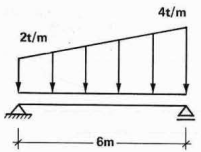

#**a)**

Reação em A: 8.00 kN
Reação em B: 10.00 kN


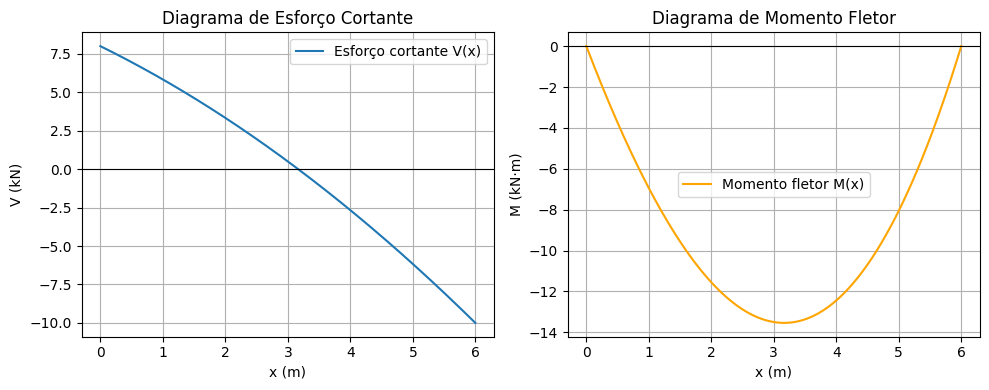

Máximo em x = 3.165, f(x) = 13.541


In [ ]:
# importando os pacotes
import numpy as np
import matplotlib.pyplot as plt
L = 6

# Reações de apoio:
RB = 10
RA = 8

print(f'Reação em A: {RA:.2f} kN')
print(f'Reação em B: {RB:.2f} kN')



# --- Esforço cortante V(x) ---
def V(x):
  if 0 <= x <= 6:
    return  8 - 2*x - (1/6 * x**2)


# --- Momento fletor M(x) ---
def M(x):
  if 0 <= x <= 6:
    return 8*x - x*x - (1/18 * x**3)  #integrei a cortante


# --- Avaliar e plotar ---

xs = np.linspace(0, L, 300)
Vs = np.array([V(x) for x in xs])
Ms = np.array([M(x) for x in xs])

plt.figure(figsize=(10,4))
plt.subplot(1,2,1)
plt.plot(xs, Vs, label='Esforço cortante V(x)')
plt.axhline(0, color='black', linewidth=0.8)
plt.title('Diagrama de Esforço Cortante')
plt.xlabel('x (m)')
plt.ylabel('V (kN)')
plt.grid(True)
plt.legend()

plt.subplot(1,2,2)
plt.plot(xs, -Ms, label='Momento fletor M(x)', color='orange')
plt.axhline(0, color='black', linewidth=0.8)
plt.title('Diagrama de Momento Fletor')
plt.xlabel('x (m)')
plt.ylabel('M (kN·m)')
plt.grid(True)
plt.legend()

plt.tight_layout()
plt.show()

from sympy import symbols, solve, diff

x = symbols('x')
f = 8*x - x**2 - (1/18)*x**3

# Derivada
df = diff(f, x)        # A função tem pontos criticos, então é possivel fazer por derivadas

# Resolve df/dx = 0
criticos = solve(df, x)

# Avalia f(x) nos pontos críticos
for ponto in criticos:
    valor = f.subs(x, ponto).evalf()
    if(0<= ponto <= 6):             # Pega apenas os pontos dentro do intervalo da viga
        print(f'Máximo em x = {ponto:.3f}, f(x) = {valor:.3f}')

#**b)**

**Solução analítica**

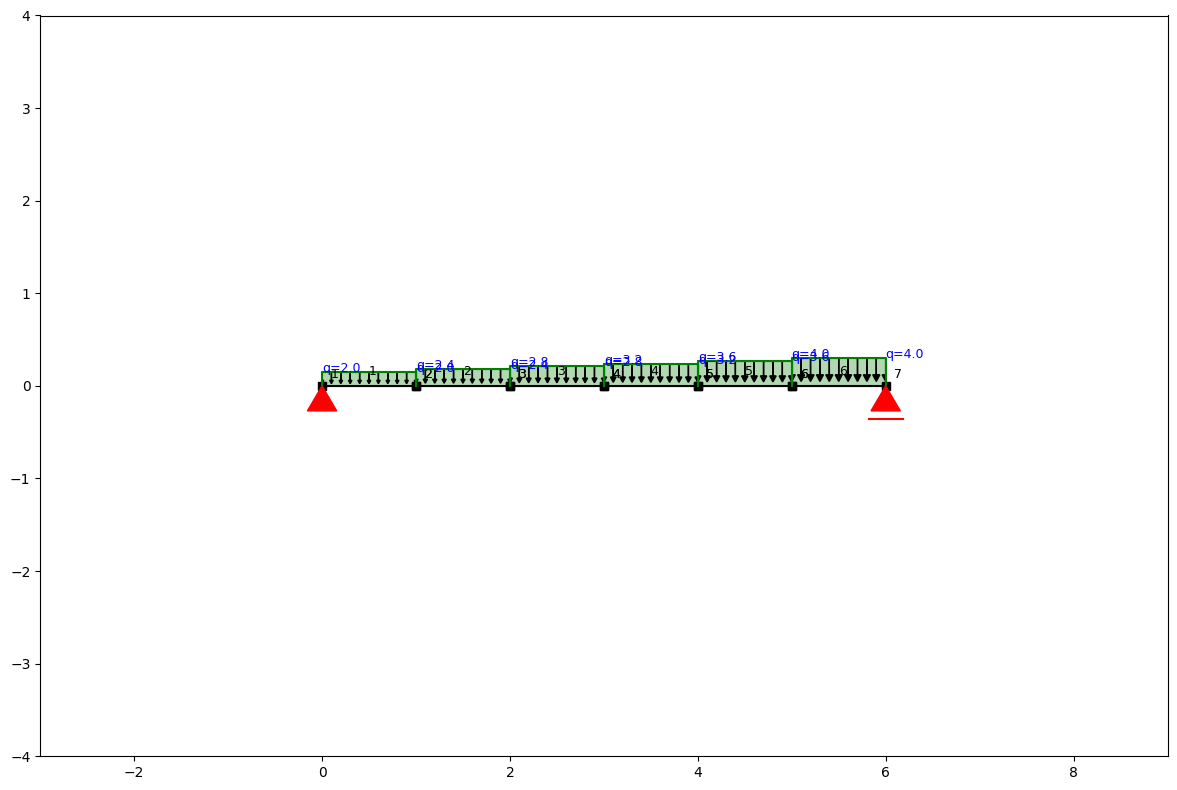

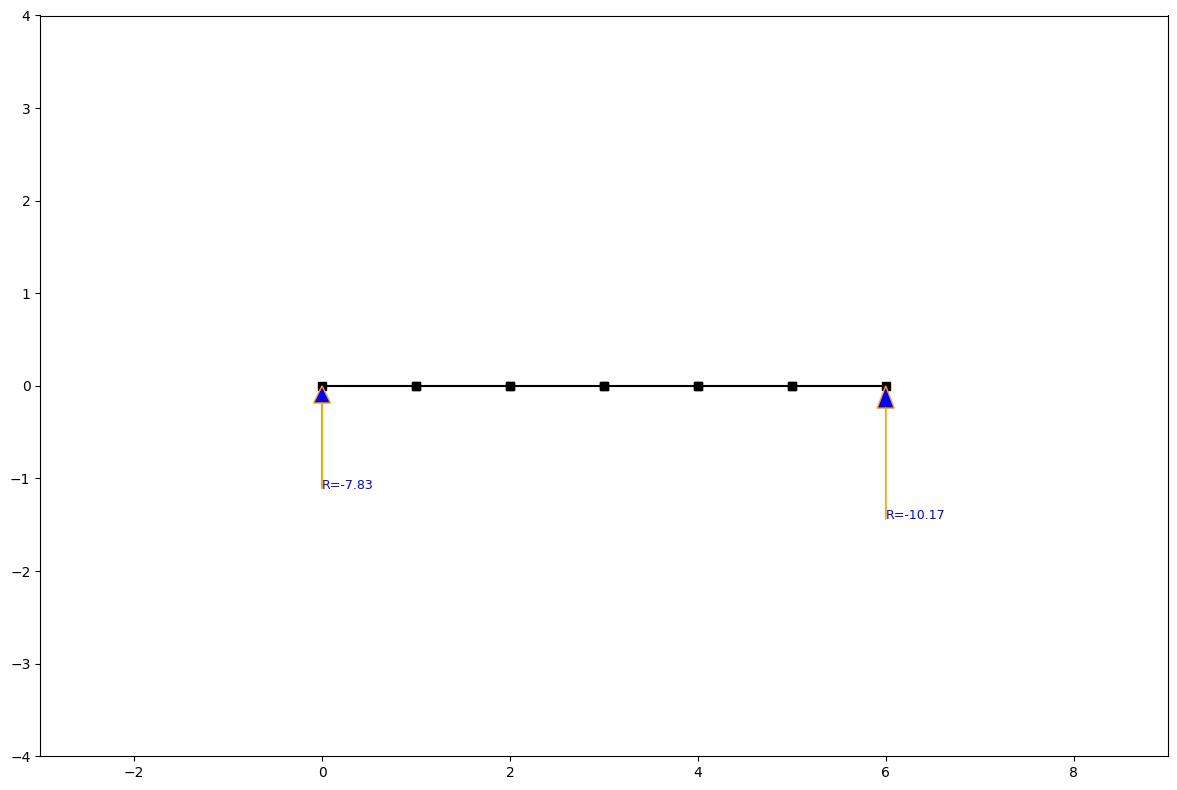

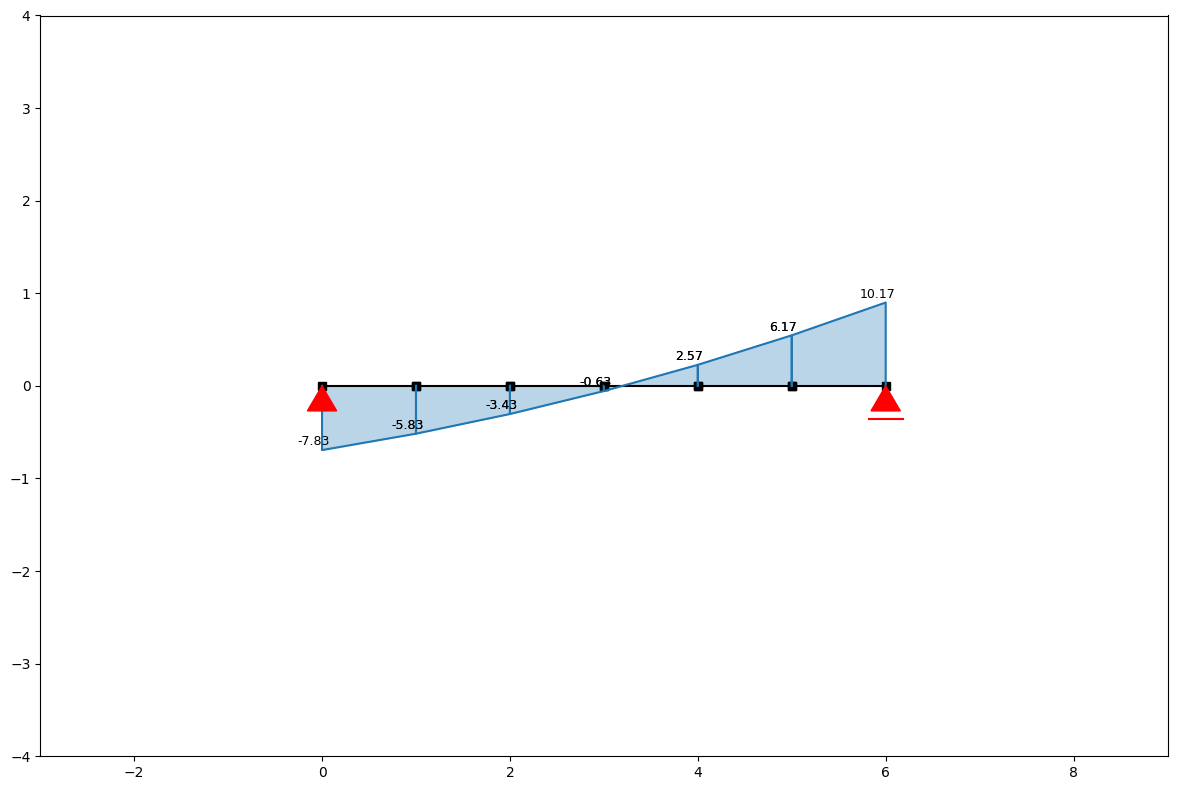

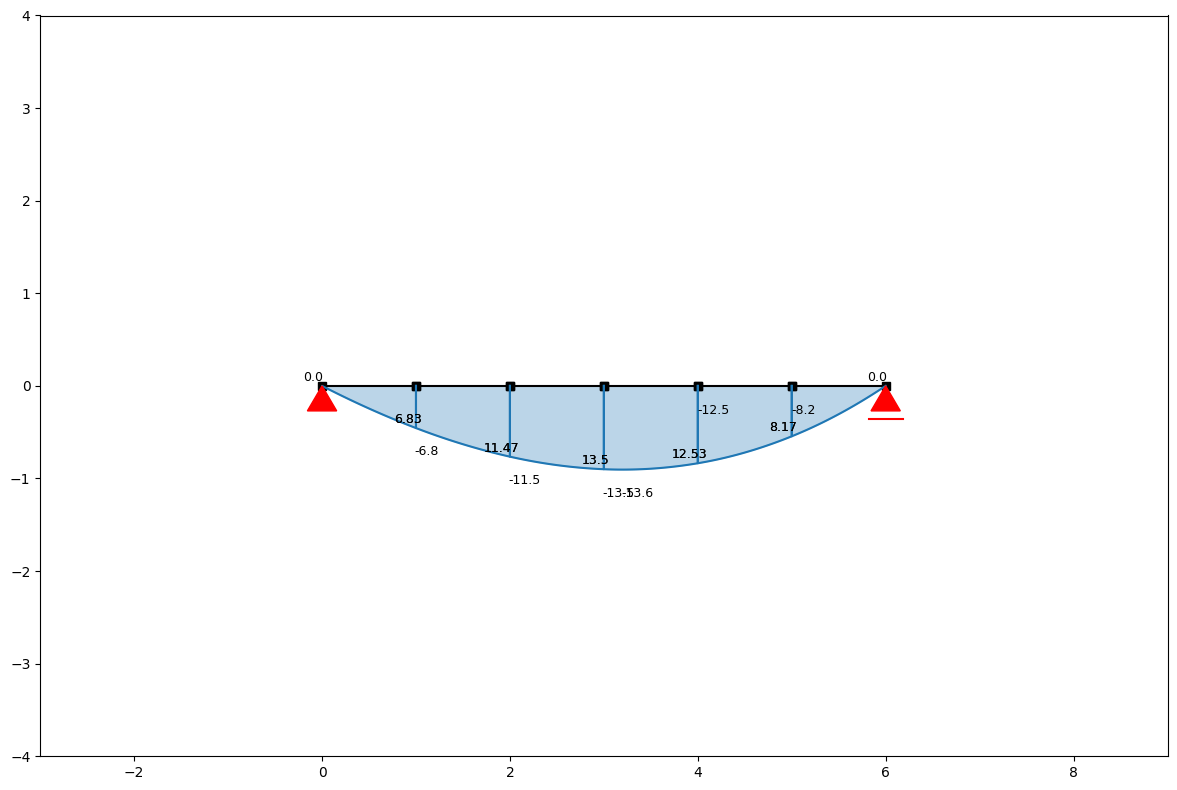

In [ ]:
# instalação do anastruct
!pip install anastruct

# importando os pacotes
import numpy as np
import matplotlib.pyplot as plt

from anastruct import SystemElements


ss = SystemElements()

# Definição dos elementos
elements = [
    [ [0, 0],   [1.0, 0] ], # elemento 1
    [ [1.0, 0], [2.0, 0] ], # elemento 2
    [ [2.0, 0], [3.0, 0] ], # elemento 3
    [ [3.0, 0], [4.0, 0] ], # elemento 4
    [ [4.0, 0], [5.0, 0] ], # elemento 5
    [ [5.0, 0], [6.0, 0] ], # elemento 6
   ]

# Definição da viga
for e in elements:
  ss.add_element(location = e)

# Apoios
ss.add_support_hinged(node_id=1)
ss.add_support_roll(node_id=7, direction='x')

# Carregamento
ss.q_load(q=-2.0, element_id=1, direction='element')
ss.q_load(q=-2.4, element_id=2, direction='element')
ss.q_load(q=-2.8, element_id=3, direction='element')
ss.q_load(q=-3.2, element_id=4, direction='element')
ss.q_load(q=-3.6, element_id=5, direction='element')
ss.q_load(q=-4.0, element_id=6, direction='element')


ss.show_structure()
ss.solve()
ss.show_reaction_force()
ss.show_shear_force()
ss.show_bending_moment()



#**c)**

**Numero mínimo de subdivisões:**

------------------------------------------------------------------------------------------------


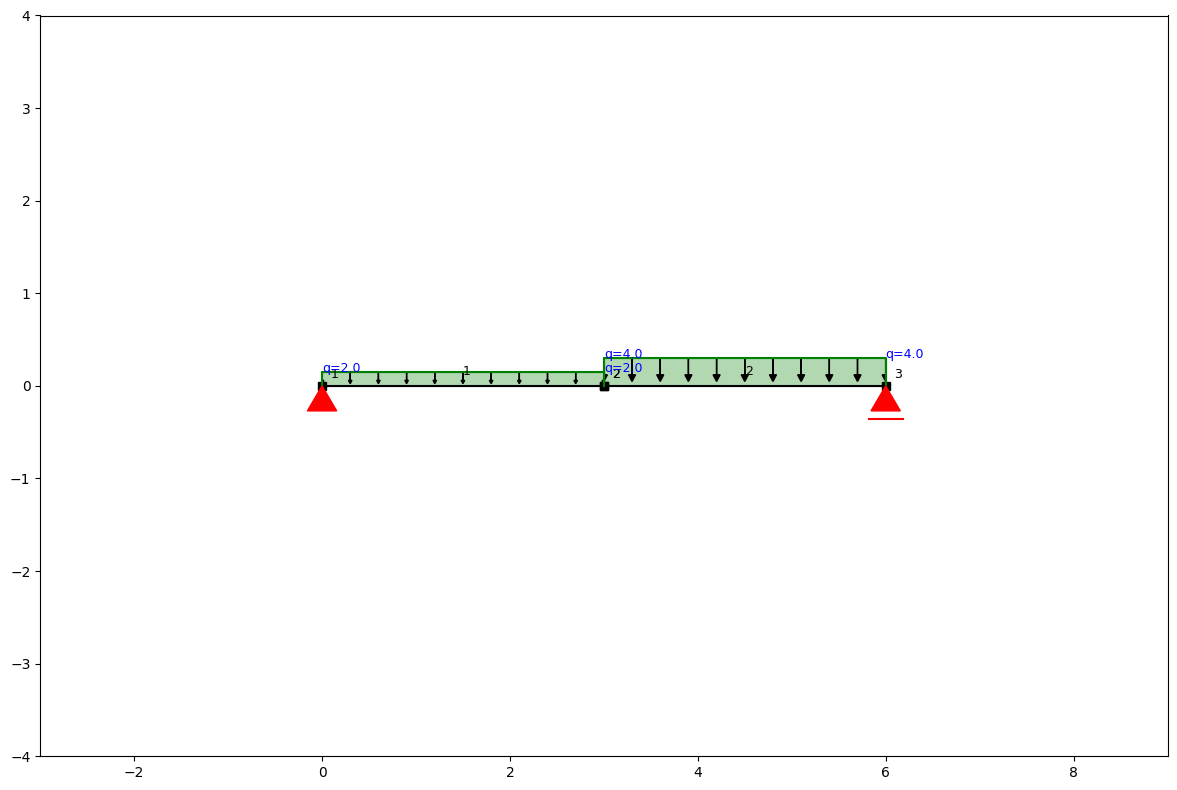

Precisão alcançada com 2 elementos
Momento fletor calculado(com erro menor que 5%): 13.781132861307794 e momento fletor real de 13.541


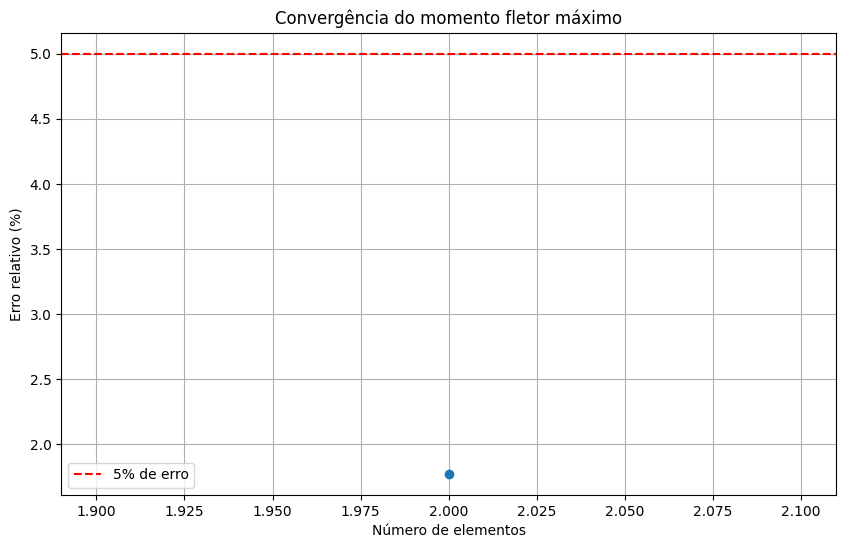


Resultados:
2 elementos: 1.77% de erro


In [ ]:
from operator import add
# instalação do anastruct
!pip install anastruct

# importando os pacotes
import numpy as np
import matplotlib.pyplot as plt
from anastruct import SystemElements
print(f"------------------------------------------------------------------------------------------------")
# Solução analítica conhecida (momento fletor máximo)
momMAX_analitico = 13.541  # tm (valor teórico)

# Parâmetros da viga
L = 6  # m (comprimento total)
qi = 2  # t/m (carga distribuída)
qf = 4

# Listas para armazenar resultados
mMAX = []
num_elementos = []
erros_relativos = []

# Loop para testar diferentes números de elementos
for ne in range(2, 39, 2):  # Testando de 1 a 20 elementos
    ss = SystemElements()

    # Criar elementos com nós igualmente espaçados
    x = np.linspace(0, L, ne + 1)  # Pontos de 0 a L
    for i in range(ne):
        ss.add_element(location=[[x[i], 0], [x[i+1], 0]])

    # Apoios:
    # - Primeiro apoio (engaste) no meio (nó correspondente a x=4m)
    # - Segundo apoio (rolete) na extremidade (último nó, x=8m)
    ss.add_support_hinged(node_id=1)
    ss.add_support_roll(node_id=ne + 1, direction='x')  # Último nó

    # Carregamento uniforme em todos os elementos
    for el in range(1, ne + 1):
        if el == 1:
          ss.q_load(q=-2, element_id=el, direction='element')

        elif el == ne:
          ss.q_load(q=-4, element_id=el, direction='element')

        else:
          ss.q_load(q=(-(qf-qi)/ne) * ( el - ne), element_id=el, direction='element')

    # Resolver
    ss.solve()
    ss.show_structure()
    momentos = []
    for el in range(1, ne + 1):  # Armazena os momentos afim de depois encontrar o maior entre eles
      momentos.extend(ss.element_map[el].bending_moment)  # Acha o maior momento

    momMAX_numerico = max(abs(m) for m in momentos)

    erro_relativo = abs((momMAX_numerico - momMAX_analitico)/momMAX_analitico)

    # Verificar se atingimos a precisão desejada
    if erro_relativo < 0.05:  # Se erro erro relativo < 5%, paramos o programa
        print(f"Precisão alcançada com {ne} elementos")
        print(f"Momento fletor calculado(com erro menor que 5%): {momMAX_numerico} e momento fletor real de {momMAX_analitico}")
        num_elementos.append(ne)
        erros_relativos.append(erro_relativo * 100)
        break
    num_elementos.append(ne)
    erros_relativos.append(erro_relativo * 100)



# Plotar gráfico de erro vs número de elementos
plt.figure(figsize=(10, 6))
plt.plot(num_elementos, erros_relativos, 'o-')
plt.axhline(y=5, color='r', linestyle='--', label='5% de erro')
plt.xlabel('Número de elementos')
plt.ylabel('Erro relativo (%)')
plt.title('Convergência do momento fletor máximo')
plt.grid(True)
plt.legend()
plt.show()

# Mostrar resultados
print("\nResultados:")
for ne, erro in zip(num_elementos, erros_relativos):
    print(f"{ne} elementos: {erro:.2f}% de erro")